#TP1 M1 info -- Introduction au traitement du signal, aux signaux sonores et aux images

**But du TP** :
* comprendre la structure d'un fichier son et d'une image
* comprendre comment afficher un fichier son ou image
* être capable de comprendre le changement de quantification et d'échantillonnage d'un fichier et être capable de générer ces changements sur un fichier.

**Avertissement** :
Il peut être tentant d'utiliser ChatGPT ou d'autres outils d'écriture de code. Mais il ne s'agit que d'une introduction, couvrant des concepts très simples pour manipuler des fichiers. Nous vous recommandons fortement de ne pas l'utiliser. Vous aurez suffisamment de temps pour réaliser par vous-même les quelques fonctions qui vous sont demandées. Et vous les assimilerez bien mieux. Vous devrez réutiliser ces fonctions pour l'évaluation, ce qui vous confrontera à de nouvelles données. Essayez donc de rendre ces fonctions aussi générales que possible.

In [1]:
# OS setup
#!cat /etc/os-release
!apt-get install -q=2 tree

# Data loading
!git clone https://gitlab.com/jeromefarinas/tp-m1-ts.git

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Cloning into 'tp-m1-ts'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 63 (delta 0), reused 0 (delta 0), pack-reused 58
Receiving objects: 100% (63/63), 2.62 MiB | 10.63 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
# Some usefull library
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
from IPython.display import Audio

In [3]:
!tree tp-m1-ts/tp1/

tp-m1-ts/tp1/
├── diner.wav
├── photo.jpg
└── resultat_attendu
    ├── diner_16khz_12bits.wav
    ├── diner_16khz_2bits.wav
    ├── diner_16khz_4bits.wav
    ├── diner_16khz_8bits.wav
    ├── diner_2khz_16bits.wav
    ├── diner_4khz_16bits.wav
    └── diner_8khz_16bits.wav

1 directory, 9 files


##Manipulation de fichiers numériques

###Signal audio

Vous pouvez essayer de charger le fichier audio avec [wav.read](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html) à partir de la bibliothèque [scipy.io.wavfile](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io.wavfile) :

In [49]:
import scipy.io.wavfile as wav
fs, signal = wav.read('tp-m1-ts/tp1/diner.wav')

Ecouter le signal :

In [5]:
Audio(data=signal, rate=fs)

* Affichez les valeurs suivantes : la fréquence d'échantillonnage, la quantification de ce fichier, le nombre d'échantillons

In [14]:
#la fréquence d'echantionnage 
fs

16000

In [11]:
signal

array([ 0,  0, -1, ...,  0, -4, -6], dtype=int16)

In [12]:
type(signal)

numpy.ndarray

In [13]:
signal.size

175125

In [ ]:
#on a 175125 valeurs prise pour 10 seconde, donc pour chaque seconde, on a prix 17512.5 valeurs par seconde, et donc 17,5khz
#le nombre de bits utlisé pour representer une valeur d'echantillion est 16 

* Afficher graphiquement le signal, avec l'axe des x en secondes

In [15]:
import matplotlib.pyplot as plt 

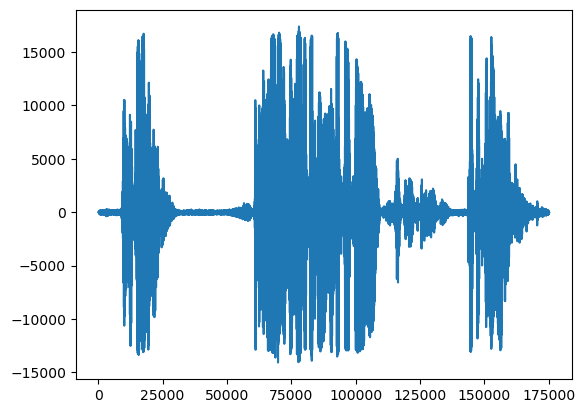

In [16]:
plt.plot(signal)
plt.show()

* Transformer des données du signal (qui est en entiers de $-2^{15}+1$ à $2^{15}$) en réels entre -1 et 1. C'est juste une nouvelle version des données, qui vous permettra de moins déborder au niveau des calculs lors de vos manipulations.

In [ ]:
# signal = signal /2^16(16-1)

In [17]:
size = 2**15 -1 + 2**15 

In [50]:
max(signal)

17403

In [51]:
import math

In [52]:
print(math.log(max(signal))/math.log(2))

14.087048404707062


In [18]:
signal = [ x/size for x in signal]

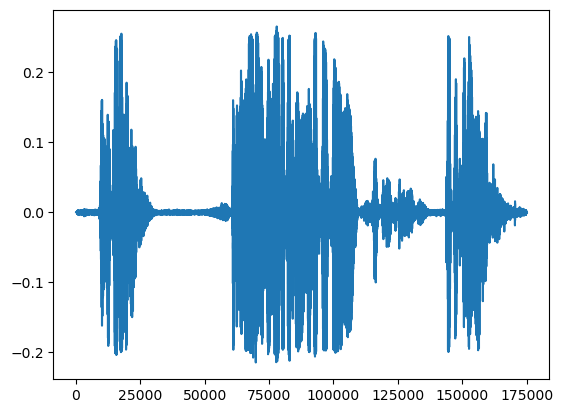

In [19]:
plt.plot(signal)
plt.show()

* Affichez a nouveau graphiquement ce signal en réels avec l'axe des abscisses en secondes. Ca ne devrait pas différer au niveau de la forme du signal en dehors de la plage de valeurs en ordonnée.


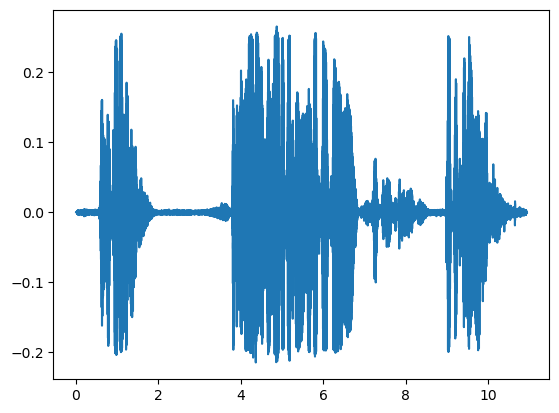

In [46]:
# Conversion de l'expression génératrice en liste
x = list((i/fs) for i in range(len(signal)))

# Utilisation de cette liste comme axe x dans plt.plot
plt.plot(x, signal)
plt.show()

In [48]:
max(signal)

0.26555275806820783

* Affichez les valeurs des 50 premières valeurs à partir de l'index 2000. Affichez aussi graphiquement ces valeurs, avec les points représentés par des "*" rouges, et les traits entre les points en bleu.


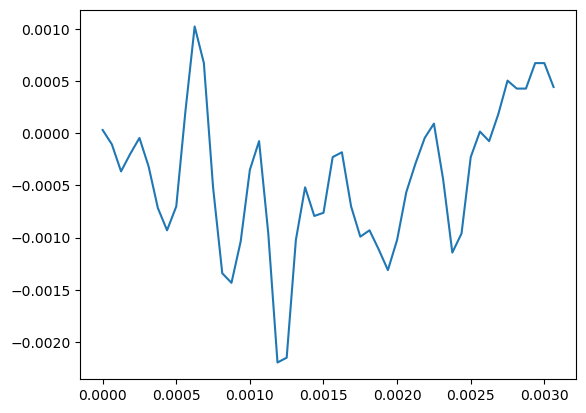

In [27]:
# Conversion de l'expression génératrice en liste
x = list((i/fs) for i in range(len(signal)))

# Utilisation de cette liste comme axe x dans plt.plot
plt.plot(x[0:50], signal[2000:2050])
plt.show()

Vous allez écouter le fichier en version ralentie et accélérée.



In [28]:
Audio(data=signal, rate=fs/2)


In [29]:
Audio(data=signal, rate=fs*2)

Qu'advient-il des fréquences ? Cette transformation est-elle normale ? Ainsi, si l'on veut jouer plus rapidement un fichier son, quel type de transformation sera nécessaire pour avoir des fréquences normales ? Est-ce que c'est ce que fait youtube avec le changement de débit à la lecture des vidéos ?

vos réponses... lorsque ce sont des voyelles, on peut ajuster les frequences en les serrant ou en etalent, mais lorsque se sont des consonnes, on ne peut pas faire bcp, c'est du time stretching 

### Image

In [30]:
img = plt.imread('tp-m1-ts/tp1/photo.jpg')

* Indiquer les caractéristiques de l'image : taille, type d'éléments


In [34]:
type(img)

numpy.ndarray

In [35]:
img

array([[[  2,  16,  91],
        [  2,  16,  91],
        [  2,  16,  91],
        ...,
        [111, 140, 198],
        [111, 140, 198],
        [111, 140, 198]],

       [[  2,  16,  91],
        [  2,  16,  91],
        [  2,  16,  91],
        ...,
        [111, 140, 198],
        [111, 140, 198],
        [111, 140, 198]],

       [[  2,  16,  91],
        [  2,  16,  91],
        [  2,  16,  91],
        ...,
        [109, 138, 196],
        [109, 138, 196],
        [109, 138, 196]],

       ...,

       [[149, 157, 180],
        [159, 167, 190],
        [166, 174, 197],
        ...,
        [126, 138, 160],
        [134, 146, 168],
        [136, 148, 170]],

       [[151, 159, 182],
        [161, 169, 192],
        [167, 175, 198],
        ...,
        [129, 141, 163],
        [134, 146, 168],
        [134, 146, 168]],

       [[155, 163, 186],
        [164, 172, 195],
        [168, 176, 199],
        ...,
        [133, 145, 167],
        [133, 145, 167],
        [130, 142, 164]]

* Affichez graphiquement cette image


In [36]:
img.shape

(595, 900, 3)

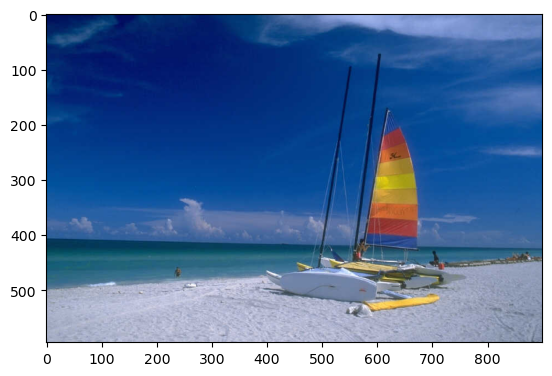

In [39]:
plt.imshow(img)
plt.show()

* Afficher les intensités RVB du premier pixel de l'image

In [40]:
img[0][0]

array([ 2, 16, 91], dtype=uint8)

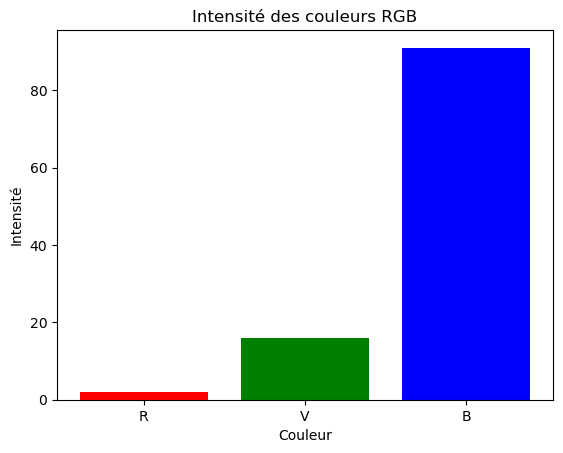

In [41]:
import matplotlib.pyplot as plt

# Intensités pour Rouge, Vert, Bleu
intensities = img[0][0]
colors = ['R', 'V', 'B']

# Créer le graphique en barres
plt.bar(colors, intensities, color=['red', 'green', 'blue'])

# Ajouter des étiquettes pour les axes
plt.xlabel('Couleur')
plt.ylabel('Intensité')

# Ajouter un titre
plt.title('Intensité des couleurs RGB')

# Afficher le graphique
plt.show()


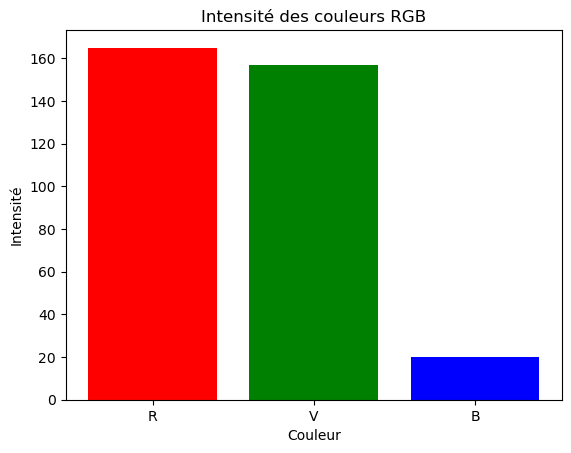

In [43]:
import matplotlib.pyplot as plt

# Intensités pour Rouge, Vert, Bleu
intensities = img[300][650]
colors = ['R', 'V', 'B']

# Créer le graphique en barres
plt.bar(colors, intensities, color=['red', 'green', 'blue'])

# Ajouter des étiquettes pour les axes
plt.xlabel('Couleur')
plt.ylabel('Intensité')

# Ajouter un titre
plt.title('Intensité des couleurs RGB')

# Afficher le graphique
plt.show()


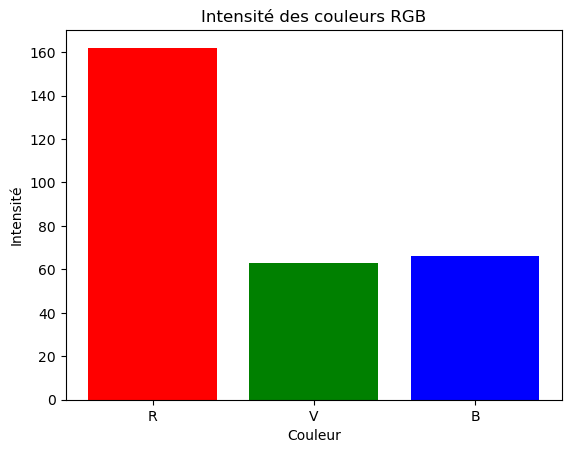

In [44]:
import matplotlib.pyplot as plt

# Intensités pour Rouge, Vert, Bleu
intensities = img[390][650]
colors = ['R', 'V', 'B']

# Créer le graphique en barres
plt.bar(colors, intensities, color=['red', 'green', 'blue'])

# Ajouter des étiquettes pour les axes
plt.xlabel('Couleur')
plt.ylabel('Intensité')

# Ajouter un titre
plt.title('Intensité des couleurs RGB')

# Afficher le graphique
plt.show()


##Quantification, échantillonnage

* Écrire une fonction pour sous-quantifier un fichier audio. Testez-la avec une quantification de 12 bits, 8 bits, 4 bits et 2 bits. Affichez à chaque fois un graphique avec chaque transformation. Que pensez-vous de la qualité sonore obtenue ?

In [53]:
quant = [12, 8, 4, 2]

In [78]:
signal__quant12 = np.array([ int(x/(15-quant[0]-1))*2**(15-quant[0]-1) for x in signal ])
signal__quant12 = signal__quant12.astype(signal.dtype)

In [82]:
signal__quant8 = np.array([ int(x/(15-quant[1]-1))*2**(15-quant[1]-1) for x in signal ])
signal__quant8 = signal__quant8.astype(signal.dtype)

In [96]:
signal__quant4 = np.array([ int(x/(15-quant[2]-1))*2**(15-quant[2]-1) for x in signal ])
signal__quant4 = signal__quant4.astype(signal.dtype)

In [81]:
Audio(data=signal__quant12, rate=fs)

In [84]:
Audio(data=signal__quant8, rate=fs)

In [95]:
Audio(data=signal__quant4, rate=fs)

In [75]:
signal__quant2 = np.array([ int(x/(15-quant[3]-1))*2**(15-quant[3]-1) for x in signal ])
signal__quant2 = signal__quant2.astype(signal.dtype)

In [76]:
Audio(data=signal__quant2, rate=fs)


* Écrire une fonction pour sauvegarder une variable audio dans un fichier. Vous pouvez utiliser [wav.write](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html). Vérifiez que l'échantillonnage et la quantification sont corrects dans les fichiers résultants.


In [86]:
variable_audio = Audio(data=signal__quant2, rate=fs)

In [88]:
import numpy as np
from scipy.io import wavfile

In [98]:
wavfile.write("diner_quant2.wav", fs, signal__quant2)

* Écrire une fonction pour sous-échantillonner un fichier audio (encodé en nombres entiers ou flottants). Testez-la avec un sous-échantillonnage x2, x4 et x8. Que remarquez-vous ?

In [ ]:
#Sous echantilloner, C'est de choisir un pas lorsqu'on passe d'un pont a un autre

* Ecrivez une fonction pour sous-quantifier une image en conservant les n bits les plus significatifs (les autres sont mis à 0). Testez-la avec 2 bits et 3 bits. Que remarquez-vous ?
Note : Vous pouvez utiliser [numpy.bitwise_and](https://numpy.org/doc/stable/reference/generated/numpy.bitwise_and.html) pour accéder à la valeur d'un bit.

In [ ]:
# à vous...